#### Generating phase plots of autaptic neurons

We'll make the U-V phase plot of the autaptic neuron

autapse adds a time-varying function to the injected current, so a 3rd dimension may be needed


In [1]:

#imports for AQUA
import sys
sys.path.append("..\\") # parent directory
from AQUA_class import AQUA
from plotting_functions import *


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
from scipy.ndimage import gaussian_filter
from tqdm import tqdm

import seaborn as sns
sns.set_theme(style = "white")

In [2]:
## To update neuron just use aqua.neuron_model(self, x, w_delay, t, I)

def flow_field(X, Y, w, I, a, b, dt):

    dx = 0.04*X**2 + 5*X + 140 - Y + w + I
    dy = a*(b*X - Y)

    #dx *= dt
    #dy *= dt

    return dx, dy


In [3]:
# We'll start by implementing the RS neuron.
# Just show the phase plot for the neuron with no autapse

# simulation params
T = 2000
dt = 0.01
N_iter = int(T/dt)

# Chaotic neuron params
a = 0.02
b = 0.2
c = -55
d = 4

# autaptic params
e = 0.05
f = 7
tau = 3  # ms

# injected current value
I = 4
I_inj = I*np.ones(N_iter)

# meshgrids for V and U
v = np.linspace(-100, 30, 50)
u = np.linspace(-30, 40, 50)
V, U = np.meshgrid(v, u)



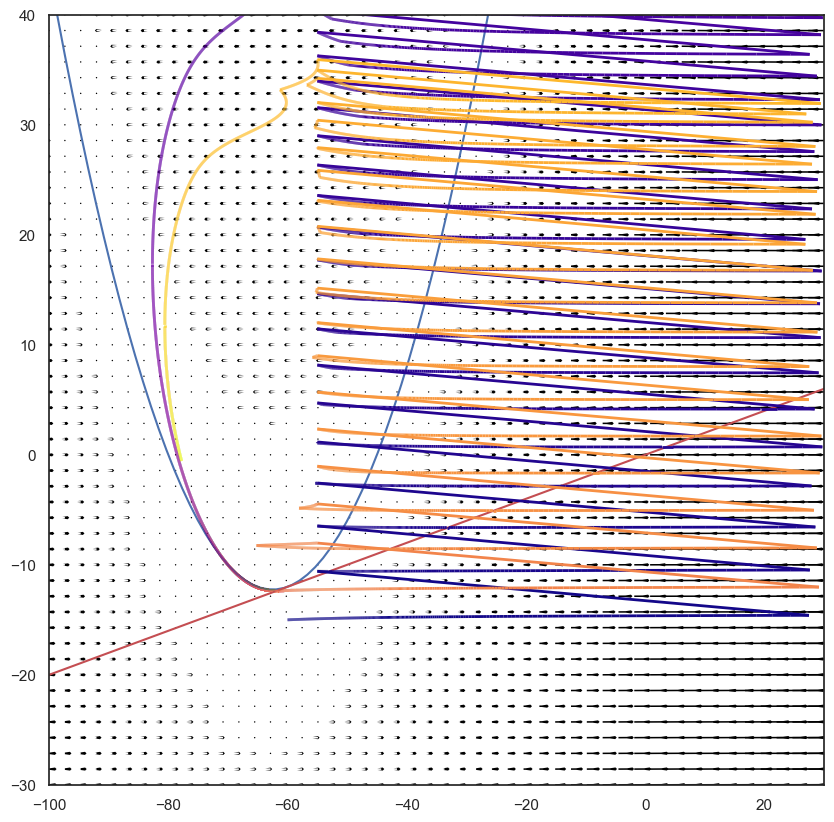

In [4]:
# Now plot the flow field at the start

fig, ax = plt.subplots(figsize = (10,10))

dv, du = flow_field(V, U, 0, I, a, b, dt)

plt.quiver(V, U, dv, du, color = 'black', angles = 'xy', width = 0.002, headwidth = 2.0, headlength = 1)

# redefine v, u for plotting nullclines at higher resolution.
v = np.linspace(-100, 30, 100)
u = np.linspace(-30, 40, 100)
v_nullcline = 0.04*v**2 + 5*v + 140 + I
u_nullcline = b*v

ax.plot(v, v_nullcline, c = 'b')
ax.plot(v, u_nullcline, c = 'r')

ax.set_xlim(np.min(v), np.max(v))
ax.set_ylim(np.min(u), np.max(u))

# show a single trajectory
neuron = AQUA(a, b, c, d, e, f, tau)
x_start = np.array([-60, -15, 0])
t_start = np.array([0])
neuron.Initialise(x_start, t_start)

X, T, spikes = neuron.update_RK2(dt, N_iter, I_inj)

split = np.arange(0, int(N_iter/5))
collection = plot_time_gradient(X, T, split)
ax.add_collection(collection)

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: ylabel='v'>, <Axes: ylabel='u'>,
        <Axes: xlabel='Time [ms]', ylabel='w'>], dtype=object))

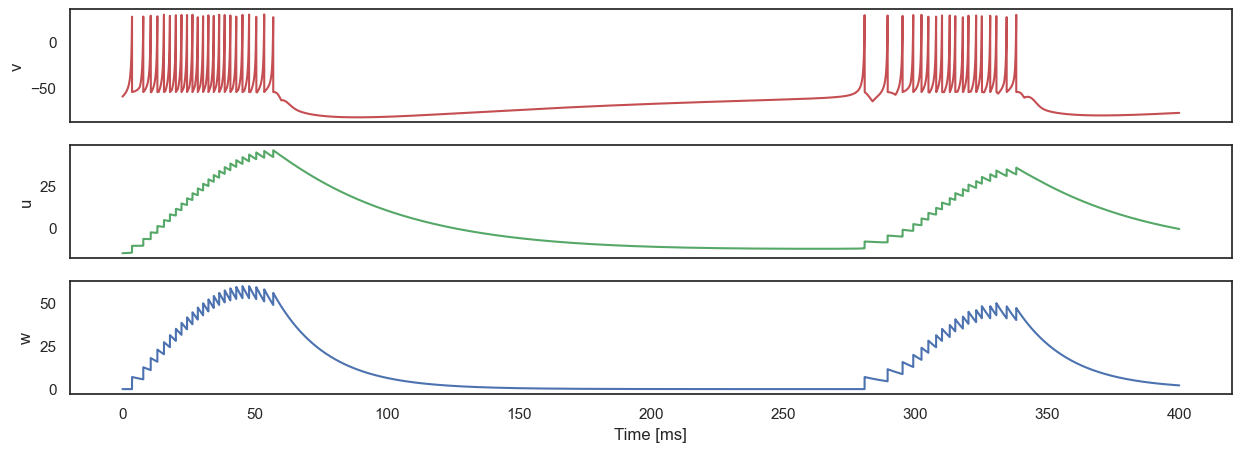

In [5]:

plot_membrane_variables(X, T, split)

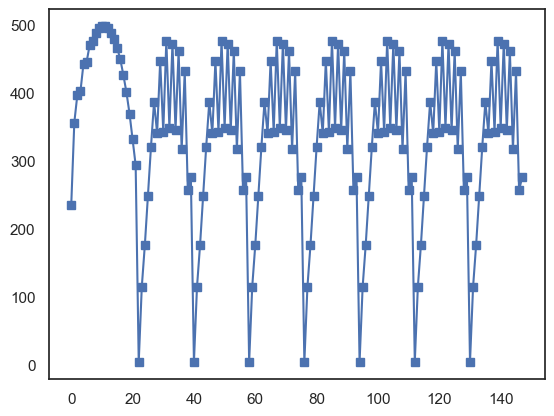

In [6]:
# print the frequency
plt.plot(1000/np.ediff1d(spikes), marker = 's')